243


,GDP
Date,
1959-06-30,3194.429
1959-09-30,3196.683
1959-12-31,3205.790
1960-03-31,3277.847
1960-06-30,3260.177
...,...
2018-12-31,18721.281
2019-03-29,18833.195
2019-06-28,18982.528


<Axes: xlabel='Date'>

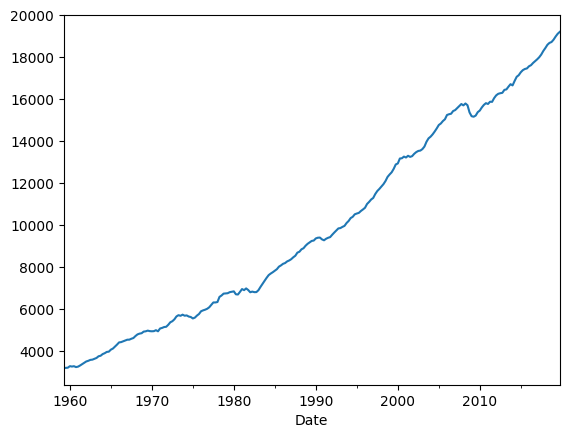

In [3]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot 
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
from patsy import dmatrices

# load dataset
GDP_raw = read_csv(r"C:\Users\zhouq\OneDrive - Nanyang Technological University\FYP\Codes\FYP\quarter.txt", header = 0, sep = ",", index_col=0, parse_dates=True, dayfirst=True)
GDP_raw = GDP_raw[1:244]
print(GDP_raw.size)
display(GDP_raw)
# plot dataset
GDP_raw['GDP'].plot()



NameError: name 'plt' is not defined

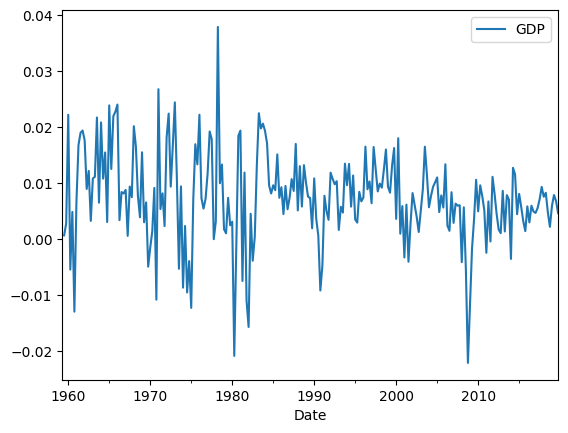

In [4]:
# transform data: take difference on log data
GDP_transform = pd.DataFrame(index=GDP_raw.index.copy())
GDP_transform = pd.DataFrame(data=GDP_raw['GDP'].apply(lambda x: math.log(x)))
GDP_transform = GDP_transform.diff()
# GDP_transform.to_csv('GDP_transform.txt', sep='\t', index=True)
GDP_transform.plot()
pyplot.title("dlog(GDP)") 

P-value:  5.4010828338042327e-11


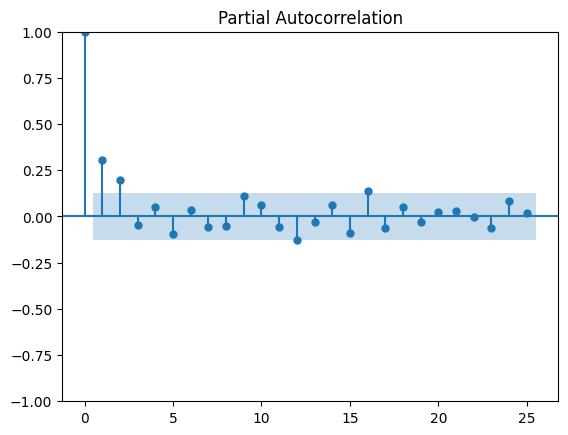

In [12]:
from statsmodels.tsa.stattools import adfuller
df_stationarityTest = adfuller(GDP_transform[1:], autolag='AIC')
print("P-value: ", df_stationarityTest[1])
# reject null hypothesis and series is stationary

from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(GDP_transform[1:], lags=25)
# suggesting AR(2) model

In [5]:
X = GDP_transform.values
model1 = AutoReg(X[1:250], lags=3)
res = model1.fit()
print(res.summary())

import statsmodels.api as sm
print(res.summary().as_latex())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  242
Model:                     AutoReg(3)   Log Likelihood                 830.293
Method:               Conditional MLE   S.D. of innovations              0.007
Date:                Tue, 16 Jan 2024   AIC                          -1650.587
Time:                        12:20:27   BIC                          -1633.204
Sample:                             3   HQIC                         -1643.582
                                  242                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.001      5.424      0.000       0.003       0.006
y.L1           0.2558      0.064      4.002      0.000       0.131       0.381
y.L2           0.2147      0.065      3.326      0.0

In [34]:
# split dataset
train, test = X[1:int(len(X)*0.8)], X[int(len(X)*0.8)+1:]
print(int(len(X)*0.8))
# train autoregression
model = AutoReg(train, lags=2)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


194
Coefficients: [0.00503697 0.20405395 0.19115993]


RMSE is 0.007332239878762849


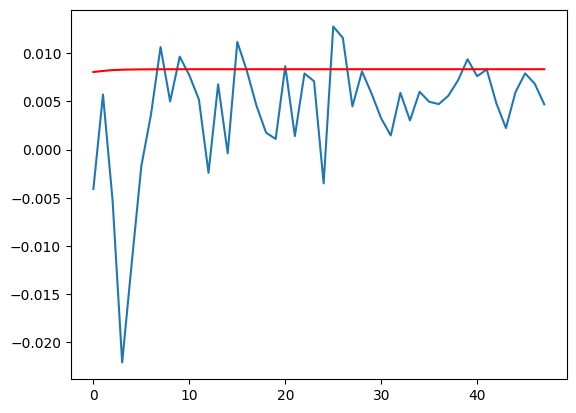

In [35]:
# Predict future values
result = model.fit()
y_pred = result.predict(195, len(X)-1)
y_true = X[195:]
mse = mean_squared_error(y_true, y_pred)
print('RMSE is',sqrt(mse))

# Plot
pyplot.plot(y_true)
pyplot.plot(y_pred, color='red')
pyplot.show()